## Data Pre-Processing

In [6]:
import pandas as pd

In [7]:
current_europe_hiring = pd.read_csv("Raw Data\\Hiring in Europe current.csv")
current_europe_market = pd.read_csv('Raw Data\\Job market in Europe current.csv')
current_europe_jobs = pd.read_csv('Raw Data\\jobs in Europe current.csv')

current_france_hiring = pd.read_csv("Raw Data\\Hiring in France current.csv")
current_france_market = pd.read_csv('Raw Data\\Job market in France current.csv')
current_france_jobs = pd.read_csv('Raw Data\\jobs in France current.csv')

current_germany_hiring = pd.read_csv("Raw Data\\Hiring in Germany current.csv")
current_germany_market = pd.read_csv('Raw Data\\Job market in Germany current.csv')
current_germany_jobs = pd.read_csv('Raw Data\\jobs in Germany current.csv')

current_italy_hiring = pd.read_csv("Raw Data\\Hiring in Italy current.csv")
#current_italy_market = pd.read_csv('Raw Data\\Job market in Italy current.csv')
current_italy_jobs = pd.read_csv('Raw Data\\jobs in Italy current.csv')

current_spain_hiring = pd.read_csv("Raw Data\\Hiring in Spain current.csv")
current_spain_market = pd.read_csv('Raw Data\\Job market in Spain current.csv')
current_spain_jobs = pd.read_csv('Raw Data\\jobs in Spain current.csv')

current_eu_hiring = pd.read_csv("Raw Data\\Hiring in the EU current.csv")
current_eu_market = pd.read_csv('Raw Data\\Job market in the EU current.csv')
current_eu_jobs = pd.read_csv('Raw Data\\jobs in the EU current.csv')

current_uk_hiring = pd.read_csv("Raw Data\\Hiring in the UK current.csv")
current_uk_market = pd.read_csv('Raw Data\\Job market in the UK current.csv')
current_uk_jobs = pd.read_csv('Raw Data\\jobs in the UK current.csv')

#current_us_hiring = pd.read_csv("Raw Data\\Hiring in the US current.csv")
#current_us_market = pd.read_csv('Raw Data\\Job market in the US current.csv')
#current_us_jobs = pd.read_csv('Raw Data\\jobs in the US current.csv')

# ===== US overall =====
current_us_hiring = pd.read_csv("Raw Data\\Hiring in the US current.csv")
current_us_market = pd.read_csv("Raw Data\\Job market in the US current.csv")
current_us_jobs = pd.read_csv("Raw Data\\jobs in the US current.csv")

# ===== New York =====
current_jobs_ny = pd.read_csv("Raw Data\\jobs in New York current.csv")
current_market_ny = pd.read_csv("Raw Data\\Job market in New York current.csv")
current_hiring_ny = pd.read_csv("Raw Data\\Hiring in New York current.csv")

# ===== California =====
current_jobs_ca = pd.read_csv("Raw Data\\jobs in California current.csv")
current_market_ca = pd.read_csv("Raw Data\\Job market in California current.csv")
current_hiring_ca = pd.read_csv("Raw Data\\Hiring in California current.csv")

# ===== Texas =====
current_jobs_tx = pd.read_csv("Raw Data\\jobs in Texas current.csv")
current_market_tx = pd.read_csv("Raw Data\\Job market in Texas current.csv")
current_hiring_tx = pd.read_csv("Raw Data\\Hiring in Texas current.csv")

# ===== Florida =====
current_jobs_fl = pd.read_csv("Raw Data\\jobs in Florida current.csv")
current_market_fl = pd.read_csv("Raw Data\\Job market in Florida current.csv")
current_hiring_fl = pd.read_csv("Raw Data\\Hiring in Florida current.csv")

# ===== Boston =====
current_jobs_boston = pd.read_csv("Raw Data\\jobs in Boston current.csv")
current_market_boston = pd.read_csv("Raw Data\\Job market in Boston current.csv")
current_hiring_boston = pd.read_csv("Raw Data\\Hiring in Boston current.csv")

# ===== Washington =====
current_jobs_wa = pd.read_csv("Raw Data\\jobs in Washington current.csv")
current_market_wa = pd.read_csv("Raw Data\\Job market in Washington current.csv")
current_hiring_wa = pd.read_csv("Raw Data\\Hiring in Washington current.csv")


past_europe_hiring = pd.read_csv("Raw Data\\Hiring in Europe past.csv")
past_europe_market = pd.read_csv('Raw Data\\Job market in Europe past.csv')
past_europe_jobs = pd.read_csv('Raw Data\\jobs in Europe past.csv')

#past_us_hiring = pd.read_csv("Raw Data\\Hiring in the US past.csv")
#past_us_market = pd.read_csv('Raw Data\\Job market in the US past.csv')
#past_us_jobs = pd.read_csv('Raw Data\\jobs in the US past.csv')

past_france_hiring = pd.read_csv("Raw Data\\Hiring in France past.csv")
past_france_market = pd.read_csv('Raw Data\\Job market in France past.csv')
past_france_jobs = pd.read_csv('Raw Data\\jobs in France past.csv')

past_germany_hiring = pd.read_csv("Raw Data\\Hiring in Germany past.csv")
past_germany_market = pd.read_csv("Raw Data\\Job market in Germany past.csv")
past_germany_jobs = pd.read_csv("Raw Data\\jobs in Germany past.csv")

past_italy_hiring = pd.read_csv("Raw Data\\Hiring in Italy past.csv")
#past_italy_market = pd.read_csv("Raw Data\\Job market in Italy past.csv")
past_italy_jobs = pd.read_csv("Raw Data\\jobs in Italy past.csv")

past_spain_hiring = pd.read_csv("Raw Data\\Hiring in Spain past.csv")
past_spain_market = pd.read_csv("Raw Data\\Job market in Spain past.csv")
past_spain_jobs = pd.read_csv("Raw Data\\jobs in Spain past.csv")

past_eu_hiring = pd.read_csv("Raw Data\\Hiring in the EU past.csv")
past_eu_market = pd.read_csv("Raw Data\\Job market in the EU past.csv")
past_eu_jobs = pd.read_csv("Raw Data\\jobs in the EU past.csv")

past_uk_hiring = pd.read_csv("Raw Data\\Hiring in the UK past.csv")
past_uk_market = pd.read_csv("Raw Data\\Job market in the UK past.csv")
past_uk_jobs = pd.read_csv("Raw Data\\jobs in the UK past.csv")

# ===== US overall =====
past_us_hiring = pd.read_csv("Raw Data\\Hiring in the US past.csv")
past_us_market = pd.read_csv("Raw Data\\Job market in the US past.csv")
past_us_jobs = pd.read_csv("Raw Data\\jobs in the US past.csv")

# ===== New York =====
past_jobs_ny = pd.read_csv("Raw Data\\jobs in New York past.csv")
past_market_ny = pd.read_csv("Raw Data\\Job market in New York past.csv")
past_hiring_ny = pd.read_csv("Raw Data\\Hiring in New York past.csv")

# ===== California =====
past_jobs_ca = pd.read_csv("Raw Data\\jobs in California past.csv")
past_market_ca = pd.read_csv("Raw Data\\Job market in California past.csv")
past_hiring_ca = pd.read_csv("Raw Data\\Hiring in California past.csv")

# ===== Texas =====
past_jobs_tx = pd.read_csv("Raw Data\\jobs in Texas past.csv")
past_market_tx = pd.read_csv("Raw Data\\Job market in Texas past.csv")
past_hiring_tx = pd.read_csv("Raw Data\\Hiring in Texas past.csv")

# ===== Florida =====
past_jobs_fl = pd.read_csv("Raw Data\\jobs in Florida past.csv")
past_market_fl = pd.read_csv("Raw Data\\Job market in Florida past.csv")
past_hiring_fl = pd.read_csv("Raw Data\\Hiring in Florida past.csv")

# ===== Boston =====
past_jobs_boston = pd.read_csv("Raw Data\\jobs in Boston past.csv")
past_market_boston = pd.read_csv("Raw Data\\Job market in Boston past.csv")
past_hiring_boston = pd.read_csv("Raw Data\\Hiring in Boston past.csv")

# ===== Washington =====
past_jobs_wa = pd.read_csv("Raw Data\\jobs in Washington past.csv")
past_market_wa = pd.read_csv("Raw Data\\Job market in Washington past.csv")
past_hiring_wa = pd.read_csv("Raw Data\\Hiring in Washington past.csv")

In [8]:
# merging per region & time period (dropping duplicates)
europe_current = pd.concat([current_europe_hiring, current_europe_jobs, current_europe_market,current_france_hiring,current_france_market,current_france_jobs,current_germany_hiring,current_germany_market,current_germany_jobs,current_italy_hiring,current_italy_jobs,current_spain_hiring,current_spain_market,current_spain_jobs,current_eu_hiring,current_eu_market,current_eu_jobs,current_uk_hiring,current_uk_market,current_uk_jobs], ignore_index=True).drop_duplicates()
europe_past = pd.concat([past_europe_hiring, past_europe_market, past_europe_jobs,past_france_hiring, past_france_market, past_france_jobs, past_germany_hiring, past_germany_market, past_germany_jobs, past_italy_hiring, past_italy_jobs, past_spain_hiring, past_spain_market, past_spain_jobs, past_eu_hiring, past_eu_market, past_eu_jobs, past_uk_hiring, past_uk_market, past_uk_jobs
], ignore_index=True).drop_duplicates()

us_current = pd.concat([current_us_hiring, current_us_jobs, current_us_market,current_us_hiring, current_us_market, current_us_jobs,
current_jobs_ny, current_market_ny, current_hiring_ny,
current_jobs_ca, current_market_ca, current_hiring_ca,
current_jobs_tx, current_market_tx, current_hiring_tx,
current_jobs_fl, current_market_fl, current_hiring_fl,
current_jobs_boston, current_market_boston, current_hiring_boston,
current_jobs_wa, current_market_wa, current_hiring_wa], ignore_index=True).drop_duplicates()
us_past = pd.concat([past_us_hiring, past_us_jobs, past_us_market,past_us_hiring, past_us_market, past_us_jobs,
past_jobs_ny, past_market_ny, past_hiring_ny,
past_jobs_ca, past_market_ca, past_hiring_ca,
past_jobs_tx, past_market_tx, past_hiring_tx,
past_jobs_fl, past_market_fl, past_hiring_fl,
past_jobs_boston, past_market_boston, past_hiring_boston,
past_jobs_wa, past_market_wa, past_hiring_wa
], ignore_index=True).drop_duplicates()

# dropping non-ascii titles (non-english titles)
europe_current = europe_current[europe_current['videoTitle'].str.encode('ascii', 'ignore').str.decode('ascii').str.len() == europe_current['videoTitle'].str.len()]
europe_past = europe_past[europe_past['videoTitle'].str.encode('ascii', 'ignore').str.decode('ascii').str.len() == europe_past['videoTitle'].str.len()]
us_current = us_current[us_current['videoTitle'].str.encode('ascii', 'ignore').str.decode('ascii').str.len() == us_current['videoTitle'].str.len()]
us_past = us_past[us_past['videoTitle'].str.encode('ascii', 'ignore').str.decode('ascii').str.len() == us_past['videoTitle'].str.len()]

# dropping non-ascii comments (non-english / special characters)
europe_current = europe_current[
    europe_current['commentText'].str.encode('ascii', 'ignore').str.decode('ascii').str.len()
    == europe_current['commentText'].str.len()
]

europe_past = europe_past[
    europe_past['commentText'].str.encode('ascii', 'ignore').str.decode('ascii').str.len()
    == europe_past['commentText'].str.len()
]

us_current = us_current[
    us_current['commentText'].str.encode('ascii', 'ignore').str.decode('ascii').str.len()
    == us_current['commentText'].str.len()
]

us_past = us_past[
    us_past['commentText'].str.encode('ascii', 'ignore').str.decode('ascii').str.len()
    == us_past['commentText'].str.len()
]


europe_current = europe_current.dropna(subset=["commentText"])
europe_past    = europe_past.dropna(subset=["commentText"])
us_current     = us_current.dropna(subset=["commentText"])
us_past        = us_past.dropna(subset=["commentText"])

import numpy as np

def clean_comments(df, col="commentText"):
    return (
        df
        # remove real NaN
        .dropna(subset=[col])
        # strip spaces
        .assign(**{col: df[col].astype(str).str.strip()})
        # remove string NaNs / empties
        .loc[lambda x: ~x[col].str.lower().isin(["NaN", "none", "null", "","nan"])]
    )

europe_current = clean_comments(europe_current)
europe_past    = clean_comments(europe_past)
us_current     = clean_comments(us_current)
us_past        = clean_comments(us_past)


europe_current.shape, europe_past.shape, us_current.shape, us_past.shape


((17613, 8), (10182, 8), (25003, 8), (9552, 8))

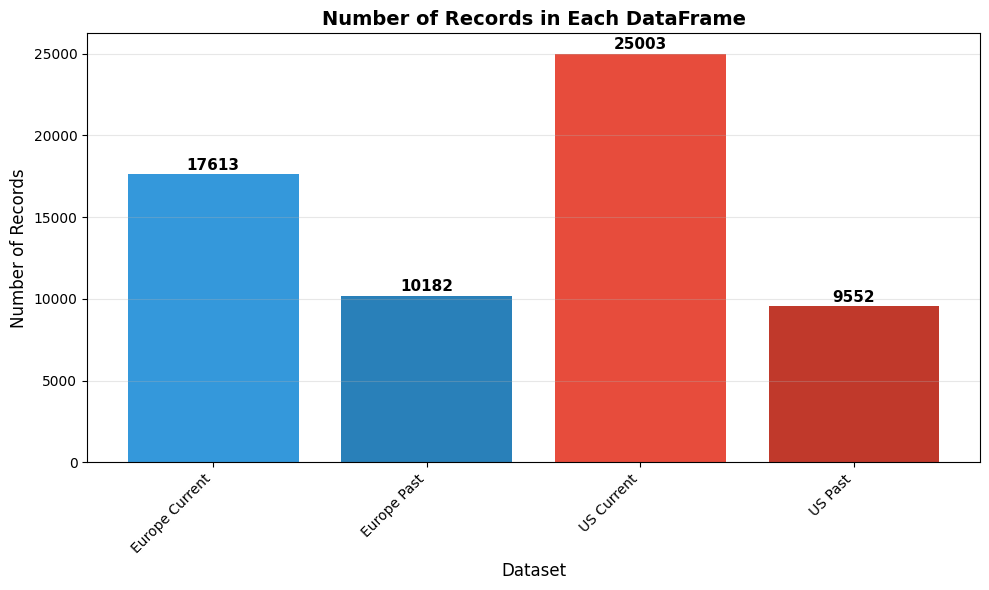

In [9]:
import matplotlib.pyplot as plt

# Create data for visualization
dataframes = {
    'Europe Current': len(europe_current),
    'Europe Past': len(europe_past),
    'US Current': len(us_current),
    'US Past': len(us_past)
}

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(dataframes.keys(), dataframes.values(), color=['#3498db', '#2980b9', '#e74c3c', '#c0392b'])
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.title('Number of Records in Each DataFrame', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for i, (key, value) in enumerate(dataframes.items()):
    plt.text(i, value + 100, str(value), ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

In [10]:
import spacy

# Load spacy model
nlp = spacy.load("en_core_web_sm")

# Function to extract named entities
def extract_entities(text, entity_types=['ORG', 'LOC', 'GPE', 'EDUCATION','PERSON','PRODUCT','NORP']):
    if pd.isna(text):
        return []
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents if ent.label_ in entity_types]
    return entities

# Process all dataframes
europe_current['entities'] = europe_current['commentText'].apply(extract_entities)
europe_past['entities'] = europe_past['commentText'].apply(extract_entities)
us_current['entities'] = us_current['commentText'].apply(extract_entities)
us_past['entities'] = us_past['commentText'].apply(extract_entities)

# Create a combined dataframe with NER results
ner_results = []

for df, region, period in [(europe_current, 'Europe', 'Current'), 
                            (europe_past, 'Europe', 'Past'),
                            (us_current, 'US', 'Current'), 
                            (us_past, 'US', 'Past')]:
    for idx, row in df.iterrows():
        for entity, label in row['entities']:
            ner_results.append({
                'region': region,
                'period': period,
                'entity': entity,
                'entity_type': label,
                'commentText': row['commentText']
            })

ner_df = pd.DataFrame(ner_results)
print(f"Total entities extracted: {len(ner_df)}")
ner_df.head(20)

Total entities extracted: 54236


,region,period,entity,entity_type,commentText
0,Europe,Current,Technical Writer,ORG,The 2nd job is Technical Writer. It's a lot mo...
1,Europe,Current,B.S. Meter,PERSON,Database administration role with little exper...
2,Europe,Current,User Manuals,ORG,Just a note: Documentation Writer is SAME as U...
3,Europe,Current,Standard Operating Procedures,ORG,Just a note: Documentation Writer is SAME as U...
4,Europe,Current,Data Centers,ORG,Just a note: Documentation Writer is SAME as U...
5,Europe,Current,Steve Jobs,PERSON,Just a note: Documentation Writer is SAME as U...
6,Europe,Current,YT,ORG,You dropped the best career gems I've seen on ...
7,Europe,Current,the User Manual Writer,ORG,As a technical writer who's performed in both ...
8,Europe,Current,AI,GPE,As a technical writer who's performed in both ...
9,Europe,Current,LLM,ORG,As a technical writer who's performed in both ...


In [11]:
top10 = (
    ner_df["entity"]
    .value_counts()
    .head(40)
    .reset_index()
)

top10.columns = ["entity", "count"]
top10

,entity,count
0,AI,1694
1,Germany,1042
2,hai,948
3,US,769
4,India,713
5,UK,656
6,Florida,485
7,Spain,423
8,Trump,414
9,Bhai,402


In [12]:
top10_no_locations = (
    ner_df[~ner_df["entity_type"].isin(["LOC","GPE"])]
    ["entity"]
    .value_counts()
    .head(50)
    .reset_index()
)

top10_no_locations.columns = ["entity", "count"]
top10_no_locations


,entity,count
0,Trump,414
1,German,387
2,American,384
3,CA,322
4,AI,282
5,Americans,228
6,EU,226
7,Amazon,200
8,Indian,193
9,Harvard,149


In [13]:
# Correlation sentiment and likes
# Add sentiment column to df
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

analyzer = SentimentIntensityAnalyzer()

scores = europe_current["commentText"].fillna("").astype(str).apply(analyzer.polarity_scores)
scores_df = pd.json_normalize(scores)

europe_current = pd.concat([europe_current, scores_df], axis=1)

europe_current.head()


,videoId,videoTitle,videoDescription,videoPublishedAt,commentAuthor,commentText,commentPublishedAt,commentLikeCount,entities,neg,neu,pos,compound
1,SU9qNEi5aYk,9 Boring But High Paying Remote Jobs (Always H...,GET CURATED RESUME TEMPLATES WITH AI PROMPTS +...,2024-12-31T00:00:18Z,@Joe-Przybranowski,I'll take boring over stressful any day of the...,2025-01-19T01:34:17Z,12353.0,[],0.000,0.915,0.085,0.0772
2,SU9qNEi5aYk,9 Boring But High Paying Remote Jobs (Always H...,GET CURATED RESUME TEMPLATES WITH AI PROMPTS +...,2024-12-31T00:00:18Z,@GreedoShot,i want to be the guy who decides how long you'...,2024-12-31T11:30:13Z,6607.0,[],0.000,1.000,0.000,0.0000
3,SU9qNEi5aYk,9 Boring But High Paying Remote Jobs (Always H...,GET CURATED RESUME TEMPLATES WITH AI PROMPTS +...,2024-12-31T00:00:18Z,@OneEyedKingg,Never listen to influencers. Nearly every job ...,2025-09-21T21:42:04Z,83.0,[],0.000,1.000,0.000,0.0000
5,SU9qNEi5aYk,9 Boring But High Paying Remote Jobs (Always H...,GET CURATED RESUME TEMPLATES WITH AI PROMPTS +...,2024-12-31T00:00:18Z,@toxboxdevel6026,"3:13 ""no experience"" and ""building a portfolio...",2025-01-31T21:49:41Z,2982.0,[],0.065,0.751,0.184,0.5563
6,SU9qNEi5aYk,9 Boring But High Paying Remote Jobs (Always H...,GET CURATED RESUME TEMPLATES WITH AI PROMPTS +...,2024-12-31T00:00:18Z,@MsBettyRubble,The 2nd job is Technical Writer. It's a lot mo...,2025-04-13T22:23:31Z,526.0,"[(Technical Writer, ORG)]",0.000,1.000,0.000,0.0000


In [14]:
top_positive = (
    europe_current
    .sort_values("compound", ascending=False)
    
)

top_positive.dropna(subset=["commentText"])
#top_positive.head(10)[["commentText", "compound"]]



,videoId,videoTitle,videoDescription,videoPublishedAt,commentAuthor,commentText,commentPublishedAt,commentLikeCount,entities,neg,neu,pos,compound
4004,DBbblyI9bRE,5 JOBS that Makes you Millionaire,NaN,2025-02-28T18:26:01Z,@Official_Skillify,How did your last job happen? That is business,2025-04-24T05:39:32Z,2.0,[],0.010,0.803,0.187,0.9931
15795,Laely_zc_Es,"Study in Finland: Job Opportunities, Top Unive...",Dreaming of studying abroad in a country known...,2025-07-14T12:34:46Z,@rishvindersingh8101,can i apply in finland without ielts???,2025-12-16T15:46:36Z,0.0,"[(finland, GPE)]",0.060,0.743,0.197,0.9873
16176,ZcRpHkixtPE,Vacancy for Mobile technician | Mobile guru #g...,NaN,2025-05-25T14:58:12Z,@Hit_ju2,Bhai chip level ka kaam nhi ata lekin oc folde...,2025-05-25T18:30:48Z,0.0,"[(Bhai, GPE), (kaam nhi, ORG), (folder jack bo...",0.035,0.809,0.155,0.9824
2615,dA_uBvEfttM,Warehouse Worker Monthly Earnings in America: ...,Looking for a job in the warehouse industry? O...,2024-01-16T00:00:25Z,@SurajKumarblog261,"Sir , rehne or khana company deta h !? Please ...",2024-08-06T06:56:59Z,1.0,"[(khana, ORG)]",0.049,0.808,0.143,0.9774
4499,03ZM8JWD56Q,"She earns $100,000 while living in Amsterdam",NaN,2024-03-06T15:51:04Z,@petewall13,shes part of the problem driving up rental pri...,2025-02-24T09:33:39Z,6.0,[],0.048,0.822,0.130,0.9769
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65921,y4dhPvGk40s,[BAD NEWS] UK Immigration &amp; Visa Changes 2025,[BAD NEWS] UK Immigration & Visa Changes 2025 ...,2025-07-04T13:26:07Z,@winston6737,"They are just cutting legal immigration, those...",2025-07-08T14:09:29Z,0.0,[],NaN,NaN,NaN,NaN
65922,y4dhPvGk40s,[BAD NEWS] UK Immigration &amp; Visa Changes 2025,[BAD NEWS] UK Immigration & Visa Changes 2025 ...,2025-07-04T13:26:07Z,@chill-p8l,Hi I have a skilled worker visa for 2yrs in ap...,2025-07-06T12:42:20Z,0.0,[],NaN,NaN,NaN,NaN
65923,y4dhPvGk40s,[BAD NEWS] UK Immigration &amp; Visa Changes 2025,[BAD NEWS] UK Immigration & Visa Changes 2025 ...,2025-07-04T13:26:07Z,@Cooterswift,I am applying for September intake and have al...,2025-07-09T14:57:10Z,0.0,[],NaN,NaN,NaN,NaN
65925,y4dhPvGk40s,[BAD NEWS] UK Immigration &amp; Visa Changes 2025,[BAD NEWS] UK Immigration & Visa Changes 2025 ...,2025-07-04T13:26:07Z,@wakamoli8248,UK needs to look at what USA are doing. UK pol...,2025-07-05T00:51:49Z,0.0,"[(UK, GPE), (USA, GPE), (UK, GPE)]",NaN,NaN,NaN,NaN


In [15]:
top_negative = (
    europe_current
    .sort_values("compound", ascending=True)
    #.head(10)[["commentText", "compound"]]
    .dropna(subset=["commentText"])
)



In [16]:
europe_current[["compound", "commentLikeCount"]].corr()


,compound,commentLikeCount
compound,1.000000,-0.011178
commentLikeCount,-0.011178,1.000000


In [17]:
# Europe Current
europe_current["tokens"] = (
    europe_current["commentText"]
    .astype(str)
    .str.lower()
    .str.findall(r"\b[a-zA-Z]+\b")
)

job_dict = {
    "engineer": ["engineer", "engineering"],
    "doctor": ["doctor", "physician", "medic"],
    "nurse": ["nurse", "nursing"],
    "teacher": ["teacher", "teaching", "professor", "lecturer"],
    "lawyer": ["lawyer", "attorney"],
    "programmer": ["programmer", "developer", "coder", "software"],
    "scientist": ["scientist", "researcher"],
    "accountant": ["accountant", "accounting"],
    "economist": ["economist", "economics"],
    "banker": ["banker", "banking"],
    "consultant": ["consultant", "consulting"],
    "journalist": ["journalist", "reporter"],
    "politician": ["politician", "minister", "senator", "mp"],
    "farmer": ["farmer", "farming", "agriculture"],
    #"worker": ["worker", "workers", "laborer", "labourer"],
    "manager": ["manager","director","ceo","vp","executive"]
}

from collections import Counter

def count_jobs(token_series, job_dict):
    job_counter = Counter()

    for tokens in token_series:
        token_set = tokens  # keep list to count multiple mentions in same comment
        for job, keywords in job_dict.items():
            for w in token_set:
                if w in keywords:
                    job_counter[job] += 1

    return job_counter

import pandas as pd

job_counts = count_jobs(europe_current["tokens"], job_dict)

job_counts


job_counts_df = (
    pd.DataFrame(job_counts.items(), columns=["job", "count"])
      .sort_values("count", ascending=False)
)

job_counts_df.head(20)





,job,count
2,engineer,355
0,programmer,271
1,manager,151
3,teacher,142
7,nurse,139
9,farmer,62
8,accountant,50
6,doctor,43
12,consultant,34
13,economist,34


In [18]:
europe_past["tokens"] = (
    europe_past["commentText"]
    .astype(str)
    .str.lower()
    .str.findall(r"\b[a-zA-Z]+\b")
)


job_counts = count_jobs(europe_past["tokens"], job_dict)

job_counts_df = (
    pd.DataFrame(job_counts.items(), columns=["job", "count"])
      .sort_values("count", ascending=False)
)

job_counts_df.head(20)

,job,count
8,engineer,293
0,teacher,134
9,nurse,122
4,programmer,84
1,manager,48
7,accountant,37
6,farmer,30
2,consultant,27
5,doctor,24
3,banker,22


In [19]:
us_past["tokens"] = (
    us_past["commentText"]
    .astype(str)
    .str.lower()
    .str.findall(r"\b[a-zA-Z]+\b")
)


job_counts = count_jobs(us_past["tokens"], job_dict)

job_counts_df = (
    pd.DataFrame(job_counts.items(), columns=["job", "count"])
      .sort_values("count", ascending=False)
)

job_counts_df.head(20)

,job,count
3,nurse,147
1,manager,91
2,teacher,90
14,accountant,41
7,engineer,40
0,programmer,30
5,economist,19
9,doctor,18
13,lawyer,16
4,politician,14


In [20]:
us_current["tokens"] = (
    us_current["commentText"]
    .astype(str)
    .str.lower()
    .str.findall(r"\b[a-zA-Z]+\b")
)


job_counts = count_jobs(us_current["tokens"], job_dict)

job_counts_df = (
    pd.DataFrame(job_counts.items(), columns=["job", "count"])
      .sort_values("count", ascending=False)
)

job_counts_df.head(20)

,job,count
1,engineer,351
2,programmer,306
6,manager,278
0,teacher,160
4,accountant,82
8,nurse,68
5,doctor,48
7,lawyer,48
12,economist,44
13,banker,41


In [21]:
import pandas as pd
from collections import Counter

def job_count_df(df, job_dict):
    counter = Counter()

    for tokens in df["tokens"]:
        for job, keywords in job_dict.items():
            for w in tokens:
                if w in keywords:
                    counter[job] += 1

    return pd.DataFrame(counter.items(), columns=["job", "count"])

ec_jobs = job_count_df(europe_current, job_dict)
ep_jobs = job_count_df(europe_past, job_dict)
uc_jobs = job_count_df(us_current, job_dict)
up_jobs = job_count_df(us_past, job_dict)

jobs_all = (
    ec_jobs.rename(columns={"count": "europe_current"})
    .merge(ep_jobs.rename(columns={"count": "europe_past"}), on="job", how="outer")
    .merge(uc_jobs.rename(columns={"count": "us_current"}), on="job", how="outer")
    .merge(up_jobs.rename(columns={"count": "us_past"}), on="job", how="outer")
    .fillna(0)
)

jobs_all = (
    ec_jobs.rename(columns={"count": "europe_current"})
    .merge(ep_jobs.rename(columns={"count": "europe_past"}), on="job", how="outer")
    .merge(uc_jobs.rename(columns={"count": "us_current"}), on="job", how="outer")
    .merge(up_jobs.rename(columns={"count": "us_past"}), on="job", how="outer")
    .fillna(0)
)

rank_corr = jobs_all[[
    "europe_current", "europe_past", "us_current", "us_past"
]].corr(method="spearman")

rank_corr



,europe_current,europe_past,us_current,us_past
europe_current,1.000000,0.908767,0.814683,0.645797
europe_past,0.908767,1.000000,0.815014,0.700000
us_current,0.814683,0.815014,1.000000,0.813226
us_past,0.645797,0.700000,0.813226,1.000000


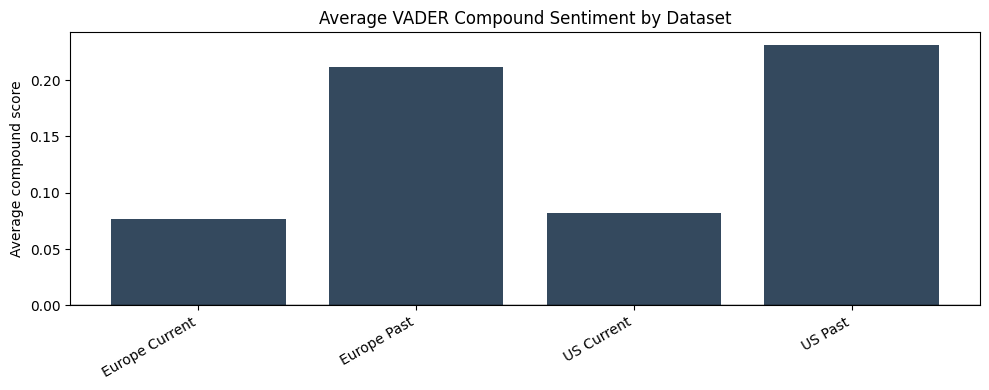

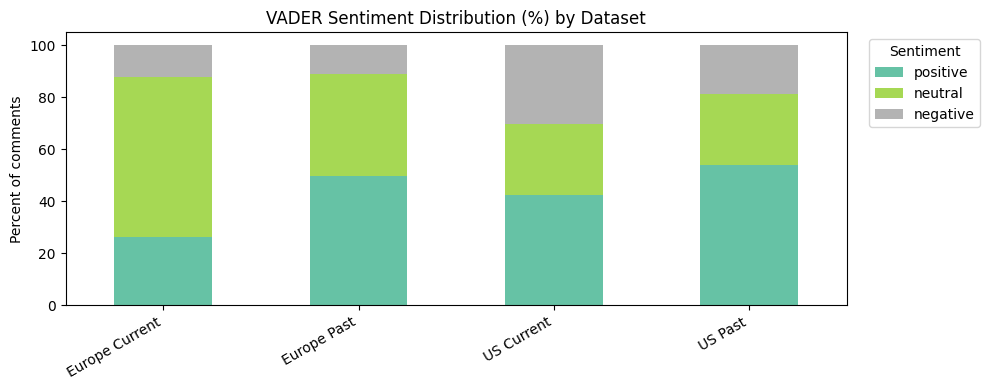

In [22]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Sentiment analysis (VADER) for the 4 dataframes: europe_current, europe_past, us_current, us_past

# Initialize VADER (download lexicon if missing)
try:
    sia = SentimentIntensityAnalyzer()
except LookupError:
    nltk.download("vader_lexicon")
    sia = SentimentIntensityAnalyzer()

def _vader_label(compound: float, pos_th: float = 0.05, neg_th: float = -0.05) -> str:
    if compound >= pos_th:
        return "positive"
    if compound <= neg_th:
        return "negative"
    return "neutral"

def add_vader_sentiment(df: pd.DataFrame, text_col: str = "commentText") -> pd.DataFrame:
    scores = df[text_col].fillna("").astype(str).apply(sia.polarity_scores).apply(pd.Series)
    # scores columns: neg, neu, pos, compound
    out = df.join(scores.add_prefix("vader_"))
    out["vader_sentiment"] = out["vader_compound"].apply(_vader_label)
    return out

# Apply to all 4 datasets (overwrite to keep downstream use simple)
europe_current = add_vader_sentiment(europe_current)
europe_past = add_vader_sentiment(europe_past)
us_current = add_vader_sentiment(us_current)
us_past = add_vader_sentiment(us_past)

# Summary table
def sentiment_summary(df: pd.DataFrame, name: str) -> dict:
    dist = df["vader_sentiment"].value_counts(normalize=True).reindex(["positive", "neutral", "negative"]).fillna(0.0)
    return {
        "dataset": name,
        "n_comments": len(df),
        "avg_compound": df["vader_compound"].mean(),
        "median_compound": df["vader_compound"].median(),
        "positive_%": 100 * dist["positive"],
        "neutral_%": 100 * dist["neutral"],
        "negative_%": 100 * dist["negative"],
    }

summary_df = pd.DataFrame(
    [
        sentiment_summary(europe_current, "Europe Current"),
        sentiment_summary(europe_past, "Europe Past"),
        sentiment_summary(us_current, "US Current"),
        sentiment_summary(us_past, "US Past"),
    ]
).sort_values("dataset")

summary_df

# Quick visualization: average compound and sentiment distribution
plt.figure(figsize=(10, 4))
plt.bar(summary_df["dataset"], summary_df["avg_compound"], color="#34495e")
plt.axhline(0, color="black", linewidth=1)
plt.title("Average VADER Compound Sentiment by Dataset")
plt.ylabel("Average compound score")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

dist_df = pd.DataFrame({
    "positive": summary_df["positive_%"].values,
    "neutral": summary_df["neutral_%"].values,
    "negative": summary_df["negative_%"].values,
}, index=summary_df["dataset"])

ax = dist_df.plot(kind="bar", stacked=True, figsize=(10, 4), colormap="Set2")
ax.set_title("VADER Sentiment Distribution (%) by Dataset")
ax.set_ylabel("Percent of comments")
ax.set_xlabel("")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Sentiment", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [23]:
'''from wordcloud import WordCloud
# Word cloud for europe_past
text_europe_past = ' '.join(europe_past['commentText'].dropna())
wordcloud_europe_past = WordCloud(width=800, height=400, background_color='white').generate(text_europe_past)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_europe_past, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Europe Past Comments', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Word cloud for us_current
text_us_current = ' '.join(us_current['commentText'].dropna())
wordcloud_us_current = WordCloud(width=800, height=400, background_color='white').generate(text_us_current)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_us_current, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - US Current Comments', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Word cloud for us_past
text_us_past = ' '.join(us_past['commentText'].dropna())
wordcloud_us_past = WordCloud(width=800, height=400, background_color='white').generate(text_us_past)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_us_past, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - US Past Comments', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()'''

"from wordcloud import WordCloud\n# Word cloud for europe_past\ntext_europe_past = ' '.join(europe_past['commentText'].dropna())\nwordcloud_europe_past = WordCloud(width=800, height=400, background_color='white').generate(text_europe_past)\n\nplt.figure(figsize=(12, 6))\nplt.imshow(wordcloud_europe_past, interpolation='bilinear')\nplt.axis('off')\nplt.title('Word Cloud - Europe Past Comments', fontsize=16, fontweight='bold')\nplt.tight_layout()\nplt.show()\n\n# Word cloud for us_current\ntext_us_current = ' '.join(us_current['commentText'].dropna())\nwordcloud_us_current = WordCloud(width=800, height=400, background_color='white').generate(text_us_current)\n\nplt.figure(figsize=(12, 6))\nplt.imshow(wordcloud_us_current, interpolation='bilinear')\nplt.axis('off')\nplt.title('Word Cloud - US Current Comments', fontsize=16, fontweight='bold')\nplt.tight_layout()\nplt.show()\n\n# Word cloud for us_past\ntext_us_past = ' '.join(us_past['commentText'].dropna())\nwordcloud_us_past = WordCloud

In [24]:
def clean_comment_column(df, col="commentText"):
    df = df.copy()
    
    # drop real NaNs
    df = df.dropna(subset=[col])
    
    # strip spaces
    df[col] = df[col].astype(str).str.strip()
    
    # drop "nan", "none", "null", empty
    df = df[~df[col].str.lower().isin(["nan", "none", "null", ""])]
    
    return df

europe_current = clean_comment_column(europe_current)
europe_past    = clean_comment_column(europe_past)
us_current     = clean_comment_column(us_current)
us_past        = clean_comment_column(us_past)


In [25]:
# LDA topic modeling for YouTube comments in:
# us_current, us_past, europe_current, europe_past
# column: commentText
#
# Uses scikit-learn: CountVectorizer -> LatentDirichletAllocation
# Produces:
# - top words per topic
# - document-topic proportions (optional)
#
# pip install scikit-learn pandas numpy

import re
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import LatentDirichletAllocation

# ---------- 1) Basic text cleaning ----------
def clean_text(s: str) -> str:
    s = "" if s is None else str(s)
    s = s.lower()
    # remove urls
    s = re.sub(r"http\S+|www\.\S+", " ", s)
    # remove @mentions and hashtags (optional)
    s = re.sub(r"[@#]\w+", " ", s)
    # keep letters/spaces
    s = re.sub(r"[^a-z\s]", " ", s)
    # collapse spaces
    s = re.sub(r"\s+", " ", s).strip()
    return s

# Extra domain stopwords (add/remove as needed)
extra_stop = {
    "youtube", "video", "channel", "subscribe", "subscribed", "like", "likes",
    "comment", "comments", "watch", "watched",
    # common political-comment filler
    "lol", "lmao", "yeah", "ok", "okay", "u", "ur", "im", "dont", "cant", "wont"
}
stop_words = set(ENGLISH_STOP_WORDS).union(extra_stop)

# ---------- 2) Fit LDA for a single dataframe ----------
def fit_lda_on_df(
    df: pd.DataFrame,
    text_col: str = "commentText",
    n_topics: int = 10,
    n_top_words: int = 12,
    max_features: int = 20_000,
    min_df: int = 10,         # increase if you have lots of comments; decrease if small dataset
    max_df: float = 0.6,      # drop super-common words
    random_state: int = 42
):
    # Clean + drop empties
    texts = (
        df[text_col]
        .astype(str)
        .map(clean_text)
    )
    texts = texts[texts.str.len() > 0]

    # Vectorize
    vectorizer = CountVectorizer(
        stop_words=list(stop_words),
        ngram_range=(1, 2),        # unigrams + bigrams (often better for comments)
        min_df=min_df,
        max_df=max_df,
        max_features=max_features
    )
    X = vectorizer.fit_transform(texts)

    # Fit LDA
    lda = LatentDirichletAllocation(
        n_components=n_topics,
        learning_method="batch",
        random_state=random_state,
        max_iter=20
    )
    doc_topic = lda.fit_transform(X)

    # Top words per topic
    feature_names = np.array(vectorizer.get_feature_names_out())
    topic_rows = []
    for k, topic in enumerate(lda.components_):
        top_idx = topic.argsort()[::-1][:n_top_words]
        topic_rows.append({
            "topic": k,
            "top_terms": ", ".join(feature_names[top_idx]),
        })
    topics_df = pd.DataFrame(topic_rows)

    # Optional: document-topic proportions back to df index (aligned to `texts`)
    doc_topic_df = pd.DataFrame(
        doc_topic,
        columns=[f"topic_{i}" for i in range(n_topics)],
        index=texts.index
    )

    return {
        "lda": lda,
        "vectorizer": vectorizer,
        "X": X,
        "topics_df": topics_df,
        "doc_topic_df": doc_topic_df,
        "clean_text_series": texts
    }

# ---------- 3) Run for all four datasets ----------
results = {}
for name, df in {
    "us_current": us_current,
    "us_past": us_past,
    "europe_current": europe_current,
    "europe_past": europe_past
}.items():
    results[name] = fit_lda_on_df(
        df,
        text_col="commentText",
        n_topics=10,        # change as you like
        n_top_words=12,
        min_df=10,          # tune depending on dataset size
        max_df=0.6
    )

# ---------- 4) Print topics ----------
for name in results:
    print("\n" + "="*80)
    print(name)
    display(results[name]["topics_df"])

# ---------- 5) (Optional) Add dominant topic per comment ----------
for name, df in {
    "us_current": us_current,
    "us_past": us_past,
    "europe_current": europe_current,
    "europe_past": europe_past
}.items():
    dt = results[name]["doc_topic_df"]
    # dominant topic + its probability
    df.loc[dt.index, "dominant_topic"] = dt.values.argmax(axis=1)
    df.loc[dt.index, "dominant_topic_prob"] = dt.values.max(axis=1)

# Now you can do:
# europe_current["dominant_topic"].value_counts()
# europe_current.groupby("dominant_topic")["dominant_topic_prob"].mean()



us_current


,topic,top_terms
0,0,"love, people, just, real, texas, state, califo..."
1,1,"job, jobs, work, market, years, months, got, j..."
2,2,"good, job, just, wage, thing, don, great, didn..."
3,3,"college, job, degree, time, school, experience..."
4,4,"america, great, best, want, need, yes, country..."
5,5,"years, just, got, people, year, home, live, ho..."
6,6,"ai, jobs, company, pay, workers, companies, ma..."
7,7,"people, don, want, companies, just, work, mone..."
8,8,"thank, thanks, man, florida, trump, love, old,..."
9,9,"data, ca, hai, sir, bro, mba, job, learn, hi, ..."



us_past


,topic,top_terms
0,0,"good, great, thanks, man, nice, job, sir, than..."
1,1,"new, just, team, need, people, say, game, goin..."
2,2,"work, people, don, want, hard, know, just, liv..."
3,3,"money, pay, wage, people, minimum, hour, make,..."
4,4,"jobs, people, california, country, school, ame..."
5,5,"job, time, work, years, life, florida, day, ju..."
6,6,"guy, company, good, looks, needs, love, car, l..."
7,7,"just, good, job, guys, really, got, bro, old, ..."
8,8,"sir, ca, job, apply, hai, experience, dubai, a..."
9,9,"thank, love, videos, interview, thanks, great,..."



europe_current


,topic,top_terms
0,0,"pay, degree, money, university, school, colleg..."
1,1,"job, experience, years, bro, market, got, data..."
2,2,"hai, bhai, sir, ka, visa, ho, ki, kya, ke, se,..."
3,3,"yes, country, uk, government, countries, spain..."
4,4,"just, work, time, people, ve, know, way, think..."
5,5,"sir, thank, apply, thanks, po, interested, goo..."
6,6,"germany, german, make, language, videos, learn..."
7,7,"people, work, level, want, money, home, living..."
8,8,"ai, jobs, years, companies, just, people, goin..."
9,9,"india, help, don, people, germany, nice, italy..."



europe_past


,topic,top_terms
0,0,"job, germany, sir, experience, apply, help, he..."
1,1,"hai, sir, ka, ki, bhai, kya, job, ke, se, ho, ..."
2,2,"ha, eu, bhai, europe, plz, european, yes, say,..."
3,3,"job, don, english, just, work, people, time, k..."
4,4,"good, uk, salary, people, pay, job, just, let,..."
5,5,"po, sa, ako, na, ko, ng, ba, god, jan, ang, ma..."
6,6,"thank, jobs, really, helpful, videos, thanks, ..."
7,7,"bro, thanks, nice, hi, want, great, informatio..."
8,8,"visa, work, good, spain, bro, permit, work per..."
9,9,"driver, years, cv, car, use, got, truck, old, ..."


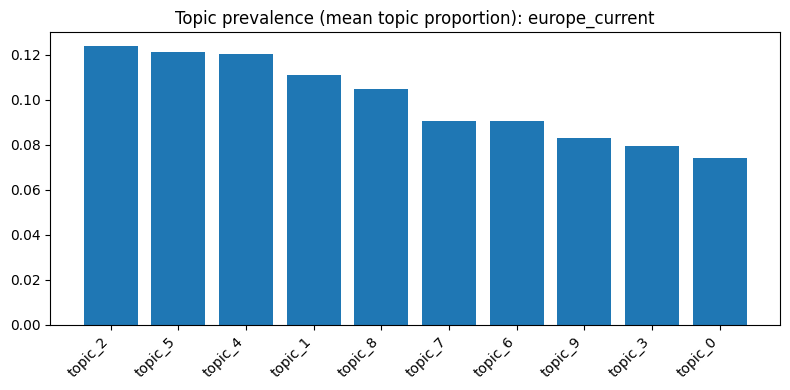

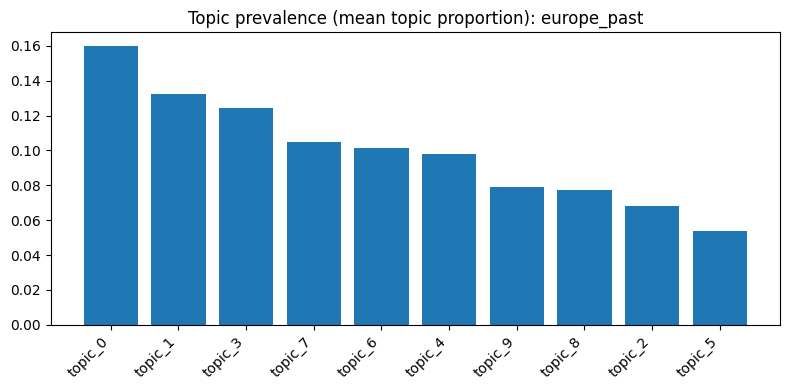

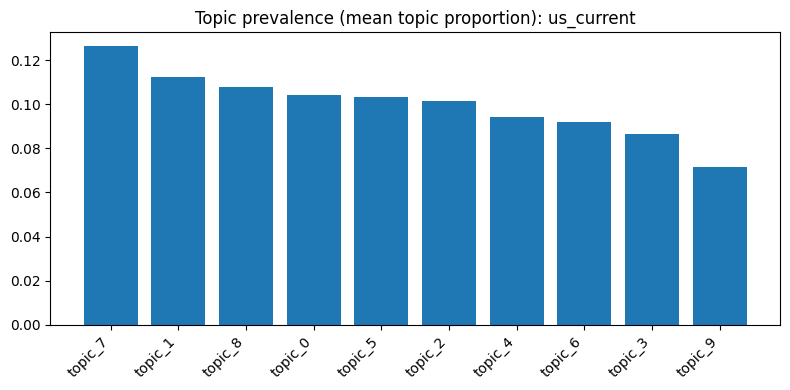

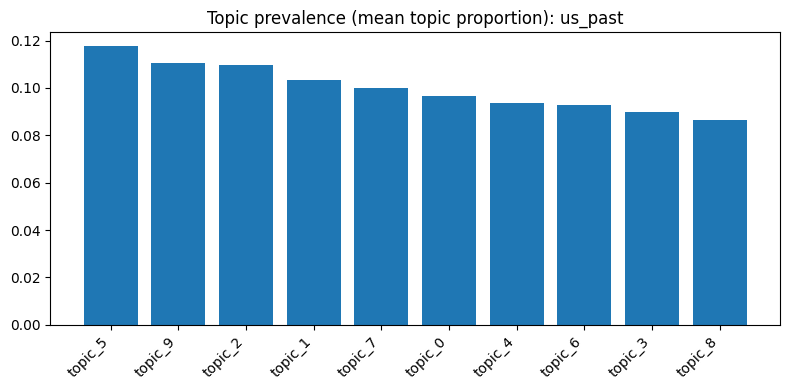

In [26]:
import matplotlib.pyplot as plt

def plot_topic_prevalence(name):
    dt = results[name]["doc_topic_df"]   # rows=docs, cols=topics
    prevalence = dt.mean(axis=0).sort_values(ascending=False)

    plt.figure(figsize=(8,4))
    plt.bar(prevalence.index, prevalence.values)
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Topic prevalence (mean topic proportion): {name}")
    plt.tight_layout()
    plt.show()

plot_topic_prevalence("europe_current")
plot_topic_prevalence("europe_past")
plot_topic_prevalence("us_current")
plot_topic_prevalence("us_past")



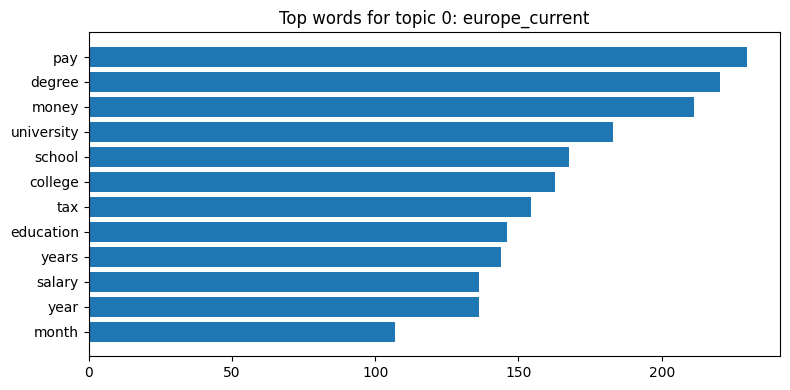

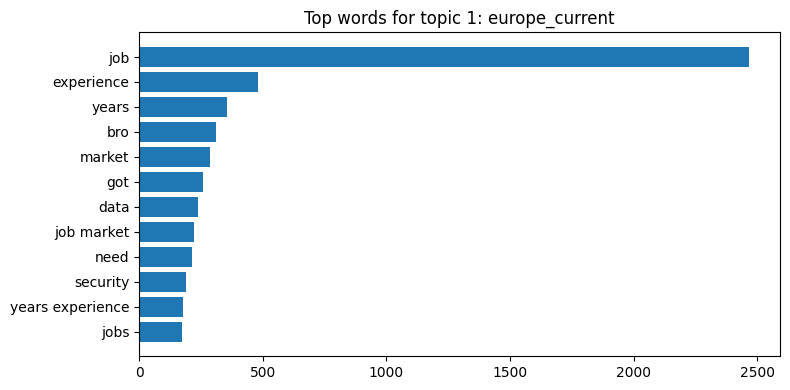

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def plot_top_words_per_topic(name, topic_id=0, top_n=12):
    lda = results[name]["lda"]
    vect = results[name]["vectorizer"]
    feature_names = np.array(vect.get_feature_names_out())

    weights = lda.components_[topic_id]
    top_idx = weights.argsort()[::-1][:top_n]

    words = feature_names[top_idx][::-1]
    vals = weights[top_idx][::-1]

    plt.figure(figsize=(8,4))
    plt.barh(words, vals)
    plt.title(f"Top words for topic {topic_id}: {name}")
    plt.tight_layout()
    plt.show()

plot_top_words_per_topic("europe_current", topic_id=0, top_n=12)
plot_top_words_per_topic("europe_current", topic_id=1, top_n=12)


In [28]:
import re
import sys
import subprocess
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import LdaModel
#from pyvis.network import Network
from IPython.display import IFrame, display
from nltk.corpus import stopwords
from nltk.corpus import stopwords

# Topic modeling (LDA via gensim) + visualization with pyvis (topic-word network)


# Install deps if missing (safe to rerun)
for pkg in ["gensim", "pyvis"]:
    try:
        __import__(pkg)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", pkg])


# NLTK stopwords (nltk already imported earlier)
try:
    _stopwords = set(stopwords.words("english"))
except LookupError:
    nltk.download("stopwords")
    _stopwords = set(stopwords.words("english"))

def _clean_text(s: str) -> str:
    s = str(s)
    s = re.sub(r"http\S+|www\.\S+", " ", s)     # urls
    s = re.sub(r"@\w+", " ", s)                 # @mentions
    s = re.sub(r"#\w+", " ", s)                 # hashtags
    s = re.sub(r"[^A-Za-z\s']", " ", s)         # keep letters/apostrophes
    s = re.sub(r"\s+", " ", s).strip().lower()
    return s

def _tokenize(s: str):
    tokens = simple_preprocess(_clean_text(s), deacc=True, min_len=3)
    return [t for t in tokens if t not in _stopwords]

def lda_with_pyvis(
    df,
    text_col="commentText",
    num_topics=8,
    passes=10,
    random_state=42,
    topn_words=12,
    min_doc_freq=5,
    max_doc_prop=0.5,
    html_path="lda_pyvis_us_current.html",
):
    texts = df[text_col].dropna().astype(str).tolist()
    tokenized = [_tokenize(t) for t in texts]
    tokenized = [toks for toks in tokenized if toks]  # drop empty docs

    dictionary = Dictionary(tokenized)
    dictionary.filter_extremes(no_below=min_doc_freq, no_above=max_doc_prop)
    corpus = [dictionary.doc2bow(toks) for toks in tokenized]
    corpus = [bow for bow in corpus if len(bow) > 0]

    lda = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        passes=passes,
        random_state=random_state,
        alpha="auto",
        eta="auto",
    )

    # topic sizes via dominant topic per document
    topic_counts = {k: 0 for k in range(num_topics)}
    for bow in corpus:
        dist = lda.get_document_topics(bow, minimum_probability=0.0)
        dom_topic = max(dist, key=lambda x: x[1])[0]
        topic_counts[dom_topic] += 1

    '''net = Network(height="750px", width="100%", bgcolor="#ffffff", font_color="#222", notebook=True, directed=False)
    net.barnes_hut()

    # Add topic nodes
    for k in range(num_topics):
        net.add_node(
            f"topic_{k}",
            label=f"Topic {k}\n(n={topic_counts.get(k, 0)})",
            shape="dot",
            size=18 + 0.01 * topic_counts.get(k, 0),
            color="#34495e",
            title=f"Topic {k}",
        )

    # Add word nodes + edges topic->word
    word_node_ids = set()
    for k in range(num_topics):
        for word, weight in lda.show_topic(k, topn=topn_words):
            wid = f"word_{word}"
            if wid not in word_node_ids:
                net.add_node(
                    wid,
                    label=word,
                    shape="ellipse",
                    size=10,
                    color="#2ecc71",
                    title=f"word: {word}",
                )
                word_node_ids.add(wid)

            net.add_edge(
                f"topic_{k}",
                wid,
                value=float(weight) * 10.0,
                title=f"P({word}|Topic {k}) = {weight:.4f}",
                color="rgba(52, 152, 219, 0.35)",
            )

    # Save + display
    net.show(html_path)
    display(IFrame(src=html_path, width="100%", height=780))

    return lda, dictionary, corpus, net'''

# Run on US current comments (change df to us_past / europe_current / europe_past as needed)
lda_model_us_current, lda_dict_us_current, lda_corpus_us_current, lda_net_us_current = lda_with_pyvis(
    us_current,
    num_topics=8,
    passes=12,
    topn_words=12,
    html_path="lda_pyvis_us_current.html",
)

# Optional: print the topics
for k, terms in lda_model_us_current.print_topics(num_topics=8, num_words=10):
    print(f"Topic {k}: {terms}")

TypeError: cannot unpack non-iterable NoneType object